# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Rio Febriyan
- **Email:** riofebriyan455@gmail.com
- **ID Dicoding:** MC370D5Y0601

## Menentukan Pertanyaan Bisnis

- Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?
- Produk apa yang paling banyak dan paling sedikit terjual?

## Import Semua Packages/Library yang Digunakan

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [5]:
#membaca data customer
customers_df = pd.read_csv('https://raw.githubusercontent.com/RioFebriyan244/Ecommers-Project-Structure/refs/heads/main/data/customers.csv')
customers_df.head(3)

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
0,1,fulan 1,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia
1,2,fulan 2,Prefer not to say,69,8327 Kirlin SummitApt. 461,8223,New Zacharyfort,South Australia,Australia
2,3,fulan 3,Prefer not to say,59,269 Gemma SummitSuite 109,5661,Aliburgh,Australian Capital Territory,Australia


In [6]:
order_df = pd.read_csv('https://raw.githubusercontent.com/RioFebriyan244/Ecommers-Project-Structure/refs/heads/main/data/orders.csv')
order_df.head(3)

,order_id,customer_id,payment,order_date,delivery_date
0,1,64,30811,2021-8-30,2021-09-24
1,2,473,50490,2021-2-3,2021-02-13
2,3,774,46763,2021-10-8,2021-11-03


In [7]:
product_df = pd.read_csv('https://raw.githubusercontent.com/RioFebriyan244/Ecommers-Project-Structure/refs/heads/main/data/products.csv')
product_df.head(3)

,product_id,product_type,product_name,size,colour,price,quantity,description
0,0,Shirt,Oxford Cloth,XS,red,114,66,"A red coloured, XS sized, Oxford Cloth Shirt"
1,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt"
2,2,Shirt,Oxford Cloth,M,red,114,54,"A red coloured, M sized, Oxford Cloth Shirt"


In [8]:
sales_df = pd.read_csv('https://raw.githubusercontent.com/RioFebriyan244/Ecommers-Project-Structure/refs/heads/main/data/sales.csv')
sales_df.head(3)

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
0,0,1,218,106,2,212.0
1,1,1,481,118,1,118.0
2,2,1,2,96,3,288.0


**Insight:**
- Menyimpan dataset customers,order,product,sales di pd.read_csv
- Menampilkan 3 data teratas pada setiap dataset

### Assessing Data

In [9]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    1007 non-null   int64 
 1   customer_name  1007 non-null   object
 2   gender         989 non-null    object
 3   age            1007 non-null   int64 
 4   home_address   1007 non-null   object
 5   zip_code       1007 non-null   int64 
 6   city           1007 non-null   object
 7   state          1007 non-null   object
 8   country        1007 non-null   object
dtypes: int64(3), object(6)
memory usage: 70.9+ KB


In [10]:
customers_df.isna().sum()

,0
customer_id,0
customer_name,0
gender,18
age,0
home_address,0
zip_code,0
city,0
state,0
country,0


In [11]:
print("Jumlah Data Duplikat :", customers_df.duplicated().sum())
customers_df.describe()

Jumlah Data Duplikat : 6


,customer_id,age,zip_code
count,1007.000000,1007.000000,1007.000000
mean,501.726912,50.929494,5012.538232
std,288.673238,30.516299,2885.836112
min,1.000000,20.000000,2.000000
25%,252.500000,34.000000,2403.500000
50%,502.000000,50.000000,5087.000000
75%,751.500000,65.000000,7493.500000
max,1000.000000,700.000000,9998.000000


In [12]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   order_id       1000 non-null   int64 
 1   customer_id    1000 non-null   int64 
 2   payment        1000 non-null   int64 
 3   order_date     1000 non-null   object
 4   delivery_date  1000 non-null   object
dtypes: int64(3), object(2)
memory usage: 39.2+ KB


In [13]:
order_df.isna().sum()

,0
order_id,0
customer_id,0
payment,0
order_date,0
delivery_date,0


In [14]:
order_df.nunique()

,0
order_id,1000
customer_id,617
payment,995
order_date,291
delivery_date,305


In [15]:
print('Jumlah Data Duplikasi : ', order_df.duplicated().sum())
order_df.describe()

Jumlah Data Duplikasi :  0


,order_id,customer_id,payment
count,1000.000000,1000.000000,1000.000000
mean,500.500000,506.640000,33972.936000
std,288.819436,277.115502,14451.609047
min,1.000000,1.000000,10043.000000
25%,250.750000,275.250000,21329.250000
50%,500.500000,515.000000,33697.500000
75%,750.250000,737.250000,46249.000000
max,1000.000000,1000.000000,59910.000000


In [16]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266 entries, 0 to 1265
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_id    1266 non-null   int64 
 1   product_type  1266 non-null   object
 2   product_name  1266 non-null   object
 3   size          1266 non-null   object
 4   colour        1266 non-null   object
 5   price         1266 non-null   int64 
 6   quantity      1266 non-null   int64 
 7   description   1266 non-null   object
dtypes: int64(3), object(5)
memory usage: 79.3+ KB


In [17]:
print('Jumlah Data Duplikasi :', product_df.duplicated().sum())
product_df.describe()

Jumlah Data Duplikasi : 6


,product_id,price,quantity
count,1266.000000,1266.000000,1266.000000
mean,627.926540,105.812006,60.138231
std,363.971586,9.715611,11.682791
min,0.000000,90.000000,40.000000
25%,313.250000,95.250000,50.000000
50%,626.500000,109.000000,60.000000
75%,942.750000,114.000000,70.000000
max,1259.000000,119.000000,80.000000


In [18]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sales_id        5000 non-null   int64  
 1   order_id        5000 non-null   int64  
 2   product_id      5000 non-null   int64  
 3   price_per_unit  5000 non-null   int64  
 4   quantity        5000 non-null   int64  
 5   total_price     4981 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 234.5 KB


In [19]:
sales_df.isna().sum()

,0
sales_id,0
order_id,0
product_id,0
price_per_unit,0
quantity,0
total_price,19


In [20]:
print("jumlah Data Duplikasi :", sales_df.duplicated().sum())
sales_df.describe()

jumlah Data Duplikasi : 0


,sales_id,order_id,product_id,price_per_unit,quantity,total_price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,4981.000000
mean,2499.500000,503.038200,634.053200,103.501600,1.99240,206.307368
std,1443.520003,285.964418,363.255794,9.195004,0.80751,86.352449
min,0.000000,1.000000,1.000000,90.000000,1.00000,90.000000
25%,1249.750000,258.000000,323.000000,95.000000,1.00000,112.000000
50%,2499.500000,504.500000,635.000000,102.000000,2.00000,204.000000
75%,3749.250000,749.000000,951.000000,112.000000,3.00000,285.000000
max,4999.000000,999.000000,1259.000000,119.000000,3.00000,357.000000


**Insight:**
- Melihat Struktur data customers,order,produst,sales lalu mengecek apakah ada data yang kosong,duplikat pada dataset tersebut
- Ternyata pada setiap dataset tersebut masih terdapat nilai yang masih kosong dan memiliki nilai duplikasi

### Cleaning Data

In [21]:
customers_df.duplicated().sum()

np.int64(6)

In [22]:
customers_df.drop_duplicates(inplace=True)

In [24]:
print("Jumlah duplikat :", customers_df.duplicated().sum())

Jumlah duplikat : 0


In [26]:
customers_df.isna().sum()

,0
customer_id,0
customer_name,0
gender,18
age,0
home_address,0
zip_code,0
city,0
state,0
country,0


In [30]:
customers_df[customers_df.gender.isna()]

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
38,39,fulan 39,NaN,80,7440 Cameron Estate DrSuite 628,4622,North Victoriachester,Northern Territory,Australia
167,168,fulan 168,NaN,27,2781 Berge MallSuite 452,1975,North Leoburgh,Western Australia,Australia
322,322,fulan 322,NaN,30,593 Becker CircleApt. 333,1640,Jacobiview,Western Australia,Australia
393,393,fulan 393,NaN,34,5158 Levi HillSuite 531,1474,Johnsburgh,Queensland,Australia
442,442,fulan 442,NaN,26,5157 Feil RoadApt. 633,7249,Port Chloe,New South Wales,Australia
722,720,fulan 720,NaN,40,31 Jordan ParadeApt. 400,1380,West Henry,South Australia,Australia
745,743,fulan 743,NaN,57,09 Christopher StreetSuite 967,6226,Lake Lukemouth,Western Australia,Australia
773,771,fulan 771,NaN,74,7367 Wright JunctionApt. 773,8882,Kuhntown,Victoria,Australia
798,795,fulan 795,NaN,49,487 Summer MewsApt. 874,1712,East Hayden,Australian Capital Territory,Australia
801,798,fulan 798,NaN,56,27 Aiden KnollApt. 875,6531,Port Sam,Australian Capital Territory,Australia


In [31]:
customers_df.gender.value_counts()

,count
gender,
Prefer not to say,725
Male,143
Female,115


In [32]:
customers_df.fillna(value='Prefer not to say', inplace=True)

In [33]:
customers_df.isna().sum()

,0
customer_id,0
customer_name,0
gender,0
age,0
home_address,0
zip_code,0
city,0
state,0
country,0


In [34]:
customers_df.describe()

,customer_id,age,zip_code
count,1001.000000,1001.000000,1001.000000
mean,500.942058,50.953047,5000.693307
std,289.013599,30.578437,2886.084454
min,1.000000,20.000000,2.000000
25%,251.000000,34.000000,2398.000000
50%,501.000000,50.000000,5079.000000
75%,751.000000,65.000000,7454.000000
max,1000.000000,700.000000,9998.000000


In [35]:
customers_df[customers_df.age == customers_df.age.max()]

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
967,961,fulan 961,Prefer not to say,700,29 Farrell ParadeSuite 818,6528,New Joseph,South Australia,Australia


In [36]:
customers_df.age.replace(customers_df.age.max(), 70, inplace=True)

<ipython-input-36-b0aaf8dd8060>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customers_df.age.replace(customers_df.age.max(), 70, inplace=True)


In [37]:
customers_df[customers_df.age == customers_df.age.max()]

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
215,216,fulan 216,Prefer not to say,500,038 Haley MewsApt. 810,3991,Bayertown,Northern Territory,Australia


In [38]:
customers_df.age.replace(customers_df.age.max(), 50, inplace=True)

<ipython-input-38-098432afa05d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customers_df.age.replace(customers_df.age.max(), 50, inplace=True)


In [39]:
customers_df.describe()

,customer_id,age,zip_code
count,1001.000000,1001.000000,1001.000000
mean,500.942058,49.874126,5000.693307
std,289.013599,17.644663,2886.084454
min,1.000000,20.000000,2.000000
25%,251.000000,34.000000,2398.000000
50%,501.000000,50.000000,5079.000000
75%,751.000000,65.000000,7454.000000
max,1000.000000,80.000000,9998.000000


In [40]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   order_id       1000 non-null   int64 
 1   customer_id    1000 non-null   int64 
 2   payment        1000 non-null   int64 
 3   order_date     1000 non-null   object
 4   delivery_date  1000 non-null   object
dtypes: int64(3), object(2)
memory usage: 39.2+ KB


In [41]:
datetime_columns = ["order_date", "delivery_date"]

for column in datetime_columns:
    order_df[column] = pd.to_datetime(order_df[column])

In [42]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       1000 non-null   int64         
 1   customer_id    1000 non-null   int64         
 2   payment        1000 non-null   int64         
 3   order_date     1000 non-null   datetime64[ns]
 4   delivery_date  1000 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(3)
memory usage: 39.2 KB


In [43]:
order_df.head()

,order_id,customer_id,payment,order_date,delivery_date
0,1,64,30811,2021-08-30,2021-09-24
1,2,473,50490,2021-02-03,2021-02-13
2,3,774,46763,2021-10-08,2021-11-03
3,4,433,39782,2021-05-06,2021-05-19
4,5,441,14719,2021-03-23,2021-03-24


In [44]:
product_df[product_df.duplicated()]

,product_id,product_type,product_name,size,colour,price,quantity,description
112,54,Shirt,Dress,XL,green,119,52,"A green coloured, XL sized, Dress Shirt"
232,146,Shirt,Linen,S,orange,116,42,"A orange coloured, S sized, Linen Shirt"
365,146,Shirt,Linen,S,orange,116,42,"A orange coloured, S sized, Linen Shirt"
435,377,Shirt,Henley,M,indigo,92,70,"A indigo coloured, M sized, Henley Shirt"
540,483,Jacket,Puffer,L,indigo,110,61,"A indigo coloured, L sized, Puffer Jacket"
587,579,Jacket,Bomber,XL,green,90,79,"A green coloured, XL sized, Bomber Jacket"


In [45]:
product_df.drop_duplicates(inplace=True)

In [46]:
print("Jumlah Data Duplikasi :", product_df.duplicated().sum())

Jumlah Data Duplikasi : 0


In [47]:
sales_df.isna().sum()

,0
sales_id,0
order_id,0
product_id,0
price_per_unit,0
quantity,0
total_price,19


In [48]:
sales_df[sales_df.total_price.isna()]

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
9,9,2,1196,105,1,NaN
121,121,27,1027,90,3,NaN
278,278,63,360,94,2,NaN
421,421,95,1091,115,1,NaN
489,489,108,1193,105,3,NaN
539,539,117,405,119,2,NaN
636,636,134,653,93,3,NaN
687,687,145,1138,102,1,NaN
854,854,177,64,104,1,NaN
1079,1079,222,908,94,3,NaN


In [49]:
sales_df['total_price'] = sales_df['price_per_unit'] * sales_df['quantity']

In [50]:
sales_df.isna().sum()

,0
sales_id,0
order_id,0
product_id,0
price_per_unit,0
quantity,0
total_price,0


In [51]:
sales_df.head(3)

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
0,0,1,218,106,2,212
1,1,1,481,118,1,118
2,2,1,2,96,3,288


**Insight:**
- Menghapus nilai duplikat pada setiap dataset
- Mengisi setiap nilai yang kosong pada setiap dataset

## Exploratory Data Analysis (EDA)

### Explore ...

In [52]:
customers_df.sample(3)

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
518,518,fulan 518,Prefer not to say,31,97 Isaac SummitSuite 935,6393,Bauchton,Northern Territory,Australia
403,403,fulan 403,Prefer not to say,78,902 Rees CircleSuite 205,1038,Port Abby,Western Australia,Australia
365,365,fulan 365,Prefer not to say,25,06 Eve RunApt. 689,4387,Jacobsshire,Tasmania,Australia


In [53]:
customers_df.describe(include="all")

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
count,1001.000000,1001,1001,1001.000000,1001,1001.000000,1001,1001,1001
unique,NaN,1000,3,NaN,1000,NaN,961,8,1
top,NaN,fulan 943,Prefer not to say,NaN,3117 Heller PlaceSuite 149,NaN,East Aidan,South Australia,Australia
freq,NaN,2,743,NaN,2,NaN,3,140,1001
mean,500.942058,NaN,NaN,49.874126,NaN,5000.693307,NaN,NaN,NaN
std,289.013599,NaN,NaN,17.644663,NaN,2886.084454,NaN,NaN,NaN
min,1.000000,NaN,NaN,20.000000,NaN,2.000000,NaN,NaN,NaN
25%,251.000000,NaN,NaN,34.000000,NaN,2398.000000,NaN,NaN,NaN
50%,501.000000,NaN,NaN,50.000000,NaN,5079.000000,NaN,NaN,NaN
75%,751.000000,NaN,NaN,65.000000,NaN,7454.000000,NaN,NaN,NaN


In [54]:
customers_df.customer_id.is_unique

False

In [55]:
customers_df.customer_id.duplicated

<bound method Series.duplicated of 0          1
1          2
2          3
3          4
4          5
        ... 
1002     996
1003     997
1004     998
1005     999
1006    1000
Name: customer_id, Length: 1001, dtype: int64>

In [56]:
customers_df.groupby(by="gender").agg({
    "customer_id" : "unique",
    "age" : ["max", "mean", "std"]
})

customer_id age  \
                                                              unique max   
gender                                                                     
Female             [1, 23, 30, 49, 65, 68, 70, 81, 84, 89, 97, 98...  79   
Male               [9, 13, 16, 18, 29, 33, 35, 37, 38, 41, 45, 48...  80   
Prefer not to say  [2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 14, 15, 17, ...  80   

                                         
                        mean        std  
gender                                   
Female             49.147826  16.646607  
Male               51.230769  18.462635  
Prefer not to say  49.725437  17.644283

In [57]:
customers_df.groupby(by="city").customer_id.nunique().sort_values(ascending=False)

,customer_id
city,
East Sophia,3
New Ava,3
East Aidan,3
Lake Sienna,2
Jademouth,2
...,...
Justinport,1
Kaiberg,1
Kaifort,1


In [58]:
customers_df.groupby(by="state").customer_id.nunique().sort_values(ascending=False)

,customer_id
state,
South Australia,139
Queensland,134
New South Wales,132
Northern Territory,125
Western Australia,124
Australian Capital Territory,121
Victoria,121
Tasmania,104


In [59]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       1000 non-null   int64         
 1   customer_id    1000 non-null   int64         
 2   payment        1000 non-null   int64         
 3   order_date     1000 non-null   datetime64[ns]
 4   delivery_date  1000 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(3)
memory usage: 39.2 KB


In [60]:
order_df.sample(4)

,order_id,customer_id,payment,order_date,delivery_date
996,997,346,53831,2021-01-18,2021-01-31
926,927,963,24139,2021-08-02,2021-08-06
11,12,120,55507,2021-06-30,2021-07-11
340,341,602,13882,2021-02-07,2021-02-09


In [61]:
delivery_time = order_df["delivery_date"] - order_df["order_date"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
order_df["delivery_time"] = round(delivery_time/86400)

order_df.sample(4)

,order_id,customer_id,payment,order_date,delivery_date,delivery_time
241,242,909,12202,2021-08-25,2021-09-13,19.0
575,576,218,12261,2021-04-26,2021-05-05,9.0
372,373,581,25727,2021-03-13,2021-04-03,21.0
849,850,254,16739,2021-04-08,2021-04-27,19.0


In [62]:
order_df.describe(include="all")

,order_id,customer_id,payment,order_date,delivery_date,delivery_time
count,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000
mean,500.500000,506.640000,33972.936000,2021-05-27 18:38:52.800000,2021-06-10 20:31:12,14.078000
min,1.000000,1.000000,10043.000000,2021-01-01 00:00:00,2021-01-03 00:00:00,1.000000
25%,250.750000,275.250000,21329.250000,2021-03-13 18:00:00,2021-03-28 00:00:00,8.000000
50%,500.500000,515.000000,33697.500000,2021-05-27 12:00:00,2021-06-11 12:00:00,14.000000
75%,750.250000,737.250000,46249.000000,2021-08-12 06:00:00,2021-08-24 06:00:00,21.000000
max,1000.000000,1000.000000,59910.000000,2021-10-24 00:00:00,2021-11-20 00:00:00,27.000000
std,288.819436,277.115502,14451.609047,NaN,NaN,7.707225


<Axes: >

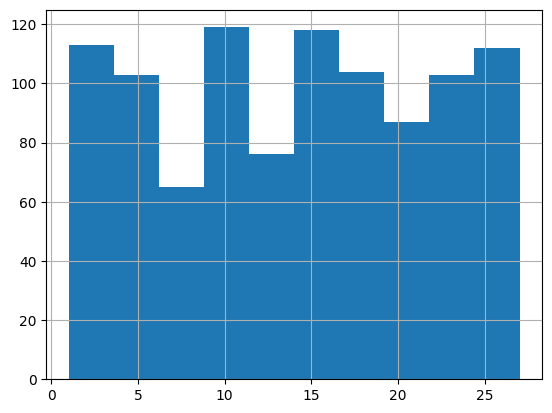

In [63]:
order_df.delivery_time.hist()

In [64]:
customers_id_in_orders_df = order_df.customer_id
customers_df["status"] = customers_df["customer_id"].apply(lambda x: "Active" if x in customers_id_in_orders_df else "Non Active")
customers_df.sample(5)

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country,status
922,917,fulan 917,Prefer not to say,36,2475 Cox CrestSuite 319,3806,North Charlesland,Western Australia,Australia,Active
790,787,fulan 787,Female,31,9871 Bailey SquareApt. 697,1417,Davidshire,South Australia,Australia,Active
513,513,fulan 513,Prefer not to say,39,051 White WayApt. 392,2358,Port Ali,Tasmania,Australia,Active
805,802,fulan 802,Female,72,26 Martin RoadSuite 393,749,Imogenmouth,Northern Territory,Australia,Active
673,672,fulan 672,Prefer not to say,59,8675 Kunde TrackSuite 283,3895,North Baileyberg,Northern Territory,Australia,Active


In [65]:
customers_df.groupby(by="status").customer_id.count()

,customer_id
status,
Active,1000
Non Active,1


In [66]:
customers_df[customers_df.status == "Non Active"]

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country,status
1006,1000,fulan 1000,Male,71,1671 Lauren KnollSuite 945,9012,Lake Audreyborough,Tasmania,Australia,Non Active


In [67]:
orders_customers_df = pd.merge(
    left=order_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
orders_customers_df.head()

,order_id,customer_id,payment,order_date,delivery_date,delivery_time,customer_name,gender,age,home_address,zip_code,city,state,country,status
0,1,64,30811,2021-08-30,2021-09-24,25.0,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active
1,2,473,50490,2021-02-03,2021-02-13,10.0,fulan 473,Male,61,531 Schmitt BoulevardApt. 010,1744,Annaton,South Australia,Australia,Active
2,3,774,46763,2021-10-08,2021-11-03,26.0,fulan 774,Prefer not to say,34,2096 Wilson MewsApt. 714,8590,West Jonathanshire,Tasmania,Australia,Active
3,4,433,39782,2021-05-06,2021-05-19,13.0,fulan 433,Prefer not to say,46,5777 Mayer PassApt. 881,9728,West Michaelport,Tasmania,Australia,Active
4,5,441,14719,2021-03-23,2021-03-24,1.0,fulan 441,Prefer not to say,53,33 Richards JunctionApt. 478,7650,South Rileyview,Western Australia,Australia,Active


In [68]:
orders_customers_df.groupby(by="city").order_id.nunique().sort_values(ascending=False).head(10)

,order_id
city,
Jordanside,6
New Ava,6
Port Hannahburgh,5
Lake Rose,5
O'keefeton,5
East Max,5
Rubyfort,5
West Kai,5
Sarahstad,4


In [69]:
orders_customers_df.groupby(by="state").order_id.nunique().sort_values(ascending=False).head(10)

,order_id
state,
South Australia,148
Queensland,139
Western Australia,130
New South Wales,129
Victoria,118
Australian Capital Territory,118
Tasmania,112
Northern Territory,106


In [70]:
orders_customers_df.groupby(by="gender").order_id.nunique().sort_values(ascending=False).head(10)

,order_id
gender,
Prefer not to say,725
Female,139
Male,136


In [71]:
orders_customers_df["age_group"] = orders_customers_df.age.apply(lambda x: "Youth" if x <= 24 else ("Seniors" if x > 64 else "Adults"))

In [72]:
orders_customers_df.groupby(by="age_group").order_id.nunique().sort_values(ascending=False).head(10)

,order_id
age_group,
Adults,681
Seniors,226
Youth,93


In [73]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1260 entries, 0 to 1265
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_id    1260 non-null   int64 
 1   product_type  1260 non-null   object
 2   product_name  1260 non-null   object
 3   size          1260 non-null   object
 4   colour        1260 non-null   object
 5   price         1260 non-null   int64 
 6   quantity      1260 non-null   int64 
 7   description   1260 non-null   object
dtypes: int64(3), object(5)
memory usage: 88.6+ KB


In [74]:
product_df.sample(5)

,product_id,product_type,product_name,size,colour,price,quantity,description
984,978,Trousers,Slim-Fit,L,violet,119,58,"A violet coloured, L sized, Slim-Fit Trousers"
65,65,Shirt,Dress,XS,violet,119,63,"A violet coloured, XS sized, Dress Shirt"
1049,1043,Trousers,Relaxed Leg,L,indigo,95,48,"A indigo coloured, L sized, Relaxed Leg Trousers"
240,238,Shirt,Chambray,L,indigo,105,79,"A indigo coloured, L sized, Chambray Shirt"
952,946,Trousers,Slim-Fit,S,red,119,71,"A red coloured, S sized, Slim-Fit Trousers"


In [75]:
product_df.describe(include="all")

,product_id,product_type,product_name,size,colour,price,quantity,description
count,1260.000000,1260,1260,1260,1260,1260.000000,1260.000000,1260
unique,NaN,3,35,8,7,NaN,NaN,1260
top,NaN,Shirt,Denim,XS,red,NaN,NaN,"A violet coloured, XL sized, Tracksuit Bottoms..."
freq,NaN,420,70,252,180,NaN,NaN,1
mean,629.500000,NaN,NaN,NaN,NaN,105.805556,60.150000,NaN
std,363.874979,NaN,NaN,NaN,NaN,9.704423,11.670573,NaN
min,0.000000,NaN,NaN,NaN,NaN,90.000000,40.000000,NaN
25%,314.750000,NaN,NaN,NaN,NaN,95.750000,50.000000,NaN
50%,629.500000,NaN,NaN,NaN,NaN,108.500000,60.000000,NaN
75%,944.250000,NaN,NaN,NaN,NaN,114.000000,70.000000,NaN


In [76]:
product_df.sort_values(by="price", ascending=False)

,product_id,product_type,product_name,size,colour,price,quantity,description
671,665,Jacket,Parka,XS,red,119,65,"A red coloured, XS sized, Parka Jacket"
672,666,Jacket,Parka,S,red,119,66,"A red coloured, S sized, Parka Jacket"
673,667,Jacket,Parka,M,red,119,56,"A red coloured, M sized, Parka Jacket"
674,668,Jacket,Parka,L,red,119,73,"A red coloured, L sized, Parka Jacket"
675,669,Jacket,Parka,XL,red,119,64,"A red coloured, XL sized, Parka Jacket"
...,...,...,...,...,...,...,...,...
1222,1216,Trousers,Pleated,S,indigo,90,41,"A indigo coloured, S sized, Pleated Trousers"
1229,1223,Trousers,Pleated,L,violet,90,48,"A violet coloured, L sized, Pleated Trousers"
1228,1222,Trousers,Pleated,M,violet,90,45,"A violet coloured, M sized, Pleated Trousers"
1227,1221,Trousers,Pleated,S,violet,90,50,"A violet coloured, S sized, Pleated Trousers"


In [77]:
product_df.groupby(by="product_type").agg({
    "product_id" : "nunique",
    "quantity" : "sum" ,
    "price" : ["min", "max"]
})

product_id quantity price     
                nunique      sum   min  max
product_type                               
Jacket              420    25387    90  119
Shirt               420    25263    92  119
Trousers            420    25139    90  119

In [78]:
product_df.groupby(by="product_name").agg({
    "product_id" : "nunique",
    "quantity" : "sum",
    "price" : ["min", "max"]
})

product_id quantity price     
                     nunique      sum   min  max
product_name                                    
Bomber                    35     2083    90   90
Camp Collared             35     2071   112  112
Cardigan                  35     2032   118  118
Cargo Pants               35     2146   106  106
Casual Slim Fit           35     2086   113  113
Chambray                  35     2020   105  105
Chinos                    35     2101   100  100
Coach                     35     2158   115  115
Cords                     35     2260   113  113
Cropped                   35     2085    99   99
Cuban Collar              35     2017    93   93
Denim                     70     4204    92  115
Drawstring                35     2042   104  104
Dress                     35     2125   119  119
Flannel                   35     2135    96   96
Henley                    35     2051    92   92
High-Waisted              35     2198    98   98
Joggers                   35     2107    94   94
Leather                   35     2276   113  113
Linen                     35     2138   116  116
Mandarin Collar           35     2203   108  108
Oxford Cloth              35     2071   114  114
Parka                     35     2201   119  119
Peacoat                   35     2067   102  102
Pleated                   35     2030    90   90
Polo                      35     2196   117  117
Puffer                    35     1946   110  110
Pullover                  35     2184   114  114
Relaxed Leg               35     2002    95   95
Shearling                 35     2169    95   95
Slim-Fit                  35     2155   119  119
Tracksuit Bottoms         35     2038    91   91
Trench Coat               35     2132   112  112
Windbreaker               35     2085   109  109
Wool                      35     1975   111  111

In [79]:
sales_df.sample(5)

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
3310,3310,668,788,91,3,273
1899,1899,381,842,113,3,339
2352,2352,477,208,98,2,196
3219,3219,649,922,96,2,192
341,341,77,1221,105,1,105


In [80]:
sales_df.describe(include="all")

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,2499.500000,503.038200,634.053200,103.501600,1.99240,206.360000
std,1443.520003,285.964418,363.255794,9.195004,0.80751,86.357457
min,0.000000,1.000000,1.000000,90.000000,1.00000,90.000000
25%,1249.750000,258.000000,323.000000,95.000000,1.00000,112.000000
50%,2499.500000,504.500000,635.000000,102.000000,2.00000,204.000000
75%,3749.250000,749.000000,951.000000,112.000000,3.00000,285.000000
max,4999.000000,999.000000,1259.000000,119.000000,3.00000,357.000000


In [81]:
sales_df.groupby(by="order_id").total_price.sum()

,total_price
order_id,
1,1487
2,1130
3,508
4,976
5,2043
...,...
995,1127
996,1459
997,204


In [82]:
sales_product_df = pd.merge(
    left = sales_df,
    right = product_df,
    how = "left",
    left_on = "product_id",
    right_on= "product_id"
)
sales_product_df.head()

,sales_id,order_id,product_id,price_per_unit,quantity_x,total_price,product_type,product_name,size,colour,price,quantity_y,description
0,0,1,218,106,2,212,Shirt,Chambray,L,orange,105,44,"A orange coloured, L sized, Chambray Shirt"
1,1,1,481,118,1,118,Jacket,Puffer,S,indigo,110,62,"A indigo coloured, S sized, Puffer Jacket"
2,2,1,2,96,3,288,Shirt,Oxford Cloth,M,red,114,54,"A red coloured, M sized, Oxford Cloth Shirt"
3,3,1,1002,106,2,212,Trousers,Wool,M,blue,111,52,"A blue coloured, M sized, Wool Trousers"
4,4,1,691,113,3,339,Jacket,Parka,S,indigo,119,53,"A indigo coloured, S sized, Parka Jacket"


In [83]:
sales_product_df.groupby(by="product_type").agg({
    "sales_id" : "nunique" ,
    "quantity_x" : "sum" ,
    "total_price" : "sum"
})

,sales_id,quantity_x,total_price
product_type,,,
Jacket,1676,3343,357026
Shirt,1641,3259,333600
Trousers,1683,3360,341174


In [84]:
sales_product_df.groupby(by="product_name").agg({
    "sales_id" : "nunique",
    "quantity_x" : "sum",
    "total_price" : "sum"
}).sort_values(by="total_price", ascending=False)

,sales_id,quantity_x,total_price
product_name,,,
Denim,273,527,52399
Casual Slim Fit,154,306,36414
Trench Coat,146,299,35581
Shearling,150,302,35334
Puffer,140,298,35164
Flannel,141,281,33158
Cropped,135,284,32660
Pleated,147,308,32340
Joggers,164,334,31062


In [85]:
all_df = pd.merge(
    left = sales_product_df,
    right = orders_customers_df,
    how = "left",
    left_on = "order_id",
    right_on = "order_id"
)
all_df.head(5)

,sales_id,order_id,product_id,price_per_unit,quantity_x,total_price,product_type,product_name,size,colour,...,customer_name,gender,age,home_address,zip_code,city,state,country,status,age_group
0,0,1,218,106,2,212,Shirt,Chambray,L,orange,...,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,Seniors
1,1,1,481,118,1,118,Jacket,Puffer,S,indigo,...,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,Seniors
2,2,1,2,96,3,288,Shirt,Oxford Cloth,M,red,...,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,Seniors
3,3,1,1002,106,2,212,Trousers,Wool,M,blue,...,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,Seniors
4,4,1,691,113,3,339,Jacket,Parka,S,indigo,...,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,Seniors


In [86]:
all_df.groupby(by=["city", "product_type"]).agg({
    "quantity_x": "sum",
    "total_price" : "sum"
})

quantity_x  total_price
city        product_type                         
Abbeyshire  Jacket                 7          683
            Shirt                  7          739
            Trousers              12         1209
Abbottburgh Jacket                 3          279
            Shirt                  9          937
...                              ...          ...
Zacharybury Trousers              17         1829
Zacshire    Jacket                 2          224
            Shirt                  2          184
Zacville    Jacket                 6          645
            Shirt                  4          394

[1602 rows x 2 columns]

In [87]:
all_df.groupby(by=["state", "product_type"]).agg({
    "quantity_x" : "sum",
    "total_price" : "sum"
})

quantity_x  total_price
state                        product_type                         
Australian Capital Territory Jacket               406        43204
                             Shirt                396        40448
                             Trousers             454        46790
New South Wales              Jacket               451        47998
                             Shirt                431        43980
                             Trousers             392        39766
Northern Territory           Jacket               365        38991
                             Shirt                336        33865
                             Trousers             384        38998
Queensland                   Jacket               499        53511
                             Shirt                417        42506
                             Trousers             453        46045
South Australia              Jacket               461        49090
                             Shirt                509        52685
                             Trousers             455        46041
Tasmania                     Jacket               412        44370
                             Shirt                387        39668
                             Trousers             379        38057
Victoria                     Jacket               359        38203
                             Shirt                390        40206
                             Trousers             414        41948
Western Australia            Jacket               390        41659
                             Shirt                393        40242
                             Trousers             429        43529

In [88]:
all_df.groupby(by=['gender', 'product_type']).agg({
    "quantity_x" : "sum",
    "total_price" : "sum"
})

quantity_x  total_price
gender            product_type                         
Female            Jacket               481        50963
                  Shirt                445        45146
                  Trousers             481        49295
Male              Jacket               480        50978
                  Shirt                410        41939
                  Trousers             453        46071
Prefer not to say Jacket              2382       255085
                  Shirt               2404       246515
                  Trousers            2426       245808

In [89]:
all_df.groupby(by=["age", "product_type"]).agg({
    "quantity_x" : "sum",
    "total_price" : "sum"
})

quantity_x  total_price
age product_type                         
20  Jacket                61         6558
    Shirt                 88         9157
    Trousers              83         8321
21  Jacket                41         4195
    Shirt                 30         3045
...                      ...          ...
79  Shirt                 30         3126
    Trousers              45         4609
80  Jacket                42         4570
    Shirt                 37         3669
    Trousers              35         3549

[183 rows x 2 columns]

In [90]:
all_df.groupby(by="state").agg({
    "order_id" : "nunique",
    "total_price" : "sum"
}).sort_values(by="total_price", ascending=False)

,order_id,total_price
state,,
South Australia,144,147816
Queensland,139,142062
New South Wales,129,131744
Australian Capital Territory,118,130442
Western Australia,130,125430
Tasmania,112,122095
Victoria,115,120357
Northern Territory,106,111854


In [91]:
all_df.to_csv("all_data_ecommers.csv", index=False)

**Insight:**
- Mencari Tahu setruktur dari setiap dataset
- menggabungkan semua nilai dari setiap dataset menjadi satu dan di simpan pada variable all_df
- Menyimpan nilai dari penggabungan seluruh dataset menjadi excel all_data_ecommers.csv

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?

In [94]:
all_df.sample(5)

,sales_id,order_id,product_id,price_per_unit,quantity_x,total_price,product_type,product_name,size,colour,...,customer_name,gender,age,home_address,zip_code,city,state,country,status,age_group
523,523,113,90,118,2,236,Shirt,Flannel,XS,blue,...,fulan 565,Prefer not to say,73,27 Kiara MeadowSuite 662,4126,Hamiltonport,Queensland,Australia,Active,Seniors
3304,3304,667,547,98,1,98,Jacket,Leather,M,blue,...,fulan 737,Prefer not to say,60,868 Skye MeadowSuite 990,1762,Harveyside,Tasmania,Australia,Active,Adults
2856,2856,571,417,119,3,357,Shirt,Casual Slim Fit,M,violet,...,fulan 472,Male,57,64 Aiden View RdSuite 085,4994,Parisianmouth,Queensland,Australia,Active,Adults
1418,1418,290,143,91,1,91,Shirt,Linen,L,red,...,fulan 364,Prefer not to say,28,3463 Joshua SummitApt. 971,2506,Swiftfort,New South Wales,Australia,Active,Adults
2524,2524,508,506,102,1,102,Jacket,Windbreaker,S,green,...,fulan 834,Prefer not to say,61,4838 Jacobi HillApt. 825,2848,Port Ellaside,New South Wales,Australia,Active,Adults


In [95]:
order_df.head(3)

,order_id,customer_id,payment,order_date,delivery_date,delivery_time
0,1,64,30811,2021-08-30,2021-09-24,25.0
1,2,473,50490,2021-02-03,2021-02-13,10.0
2,3,774,46763,2021-10-08,2021-11-03,26.0


In [97]:
monthly_orders_df = all_df.resample(rule='M', on='order_date').agg({
    "order_id": "nunique",
    "total_price": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%B')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "total_price": "revenue"
}, inplace=True)
monthly_orders_df.head()

<ipython-input-97-b5c67aca02cc>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders_df = all_df.resample(rule='M', on='order_date').agg({


,order_date,order_count,revenue
0,January,109,119333
1,February,93,95080
2,March,117,131364
3,April,99,97530
4,May,84,85597


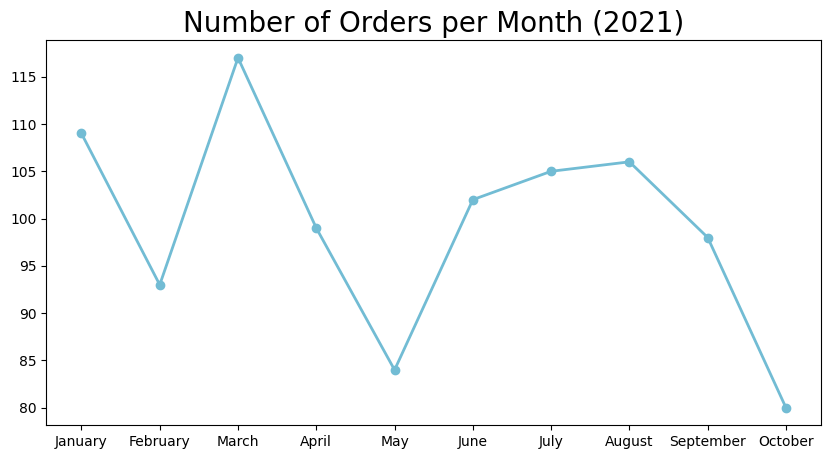

In [98]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_orders_df["order_date"],
    monthly_orders_df["order_count"],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)
plt.title("Number of Orders per Month (2021)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

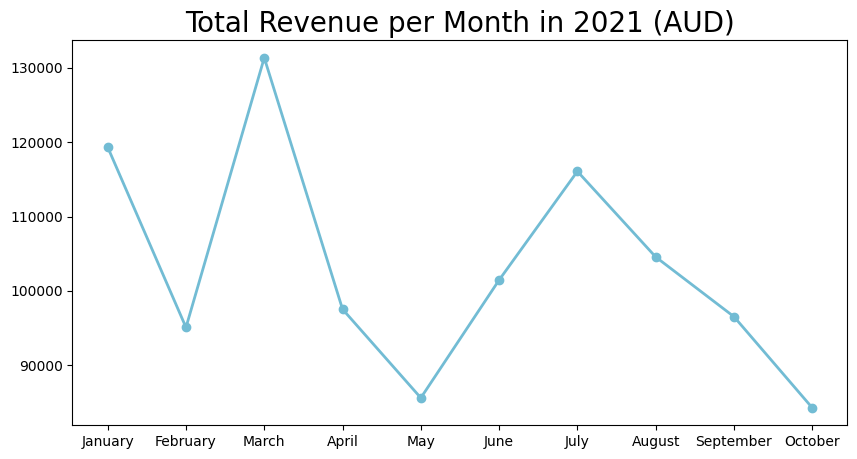

In [99]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_orders_df["order_date"],
    monthly_orders_df["revenue"],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)
plt.title("Total Revenue per Month in 2021 (AUD)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### Pertanyaan 2: Produk apa yang paling banyak dan paling sedikit terjual?


In [101]:
sum_order_items_df = all_df.groupby("product_name").quantity_x.sum().sort_values(ascending=False).reset_index()
sum_order_items_df.head(10)

,product_name,quantity_x
0,Denim,527
1,Joggers,334
2,Pleated,308
3,Casual Slim Fit,306
4,Shearling,302
5,Relaxed Leg,301
6,Trench Coat,299
7,Puffer,298
8,Bomber,297
9,Chambray,290


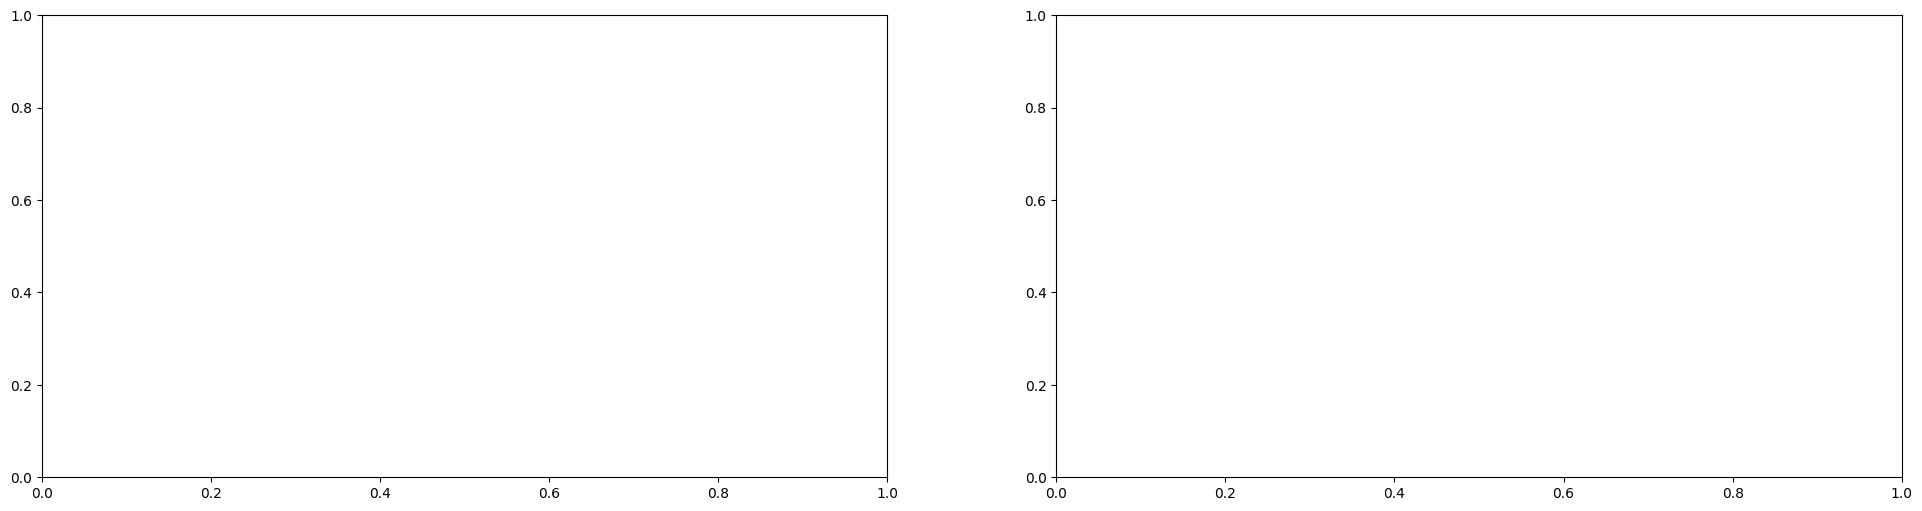

In [102]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))


<ipython-input-103-9387526f38c8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="quantity_x", y="product_name", data=sum_order_items_df.head(5), palette=colors, ax=ax[0])
<ipython-input-103-9387526f38c8>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="quantity_x", y="product_name", data=sum_order_items_df.sort_values(by="quantity_x", ascending=True).head(5), palette=colors, ax=ax[1])


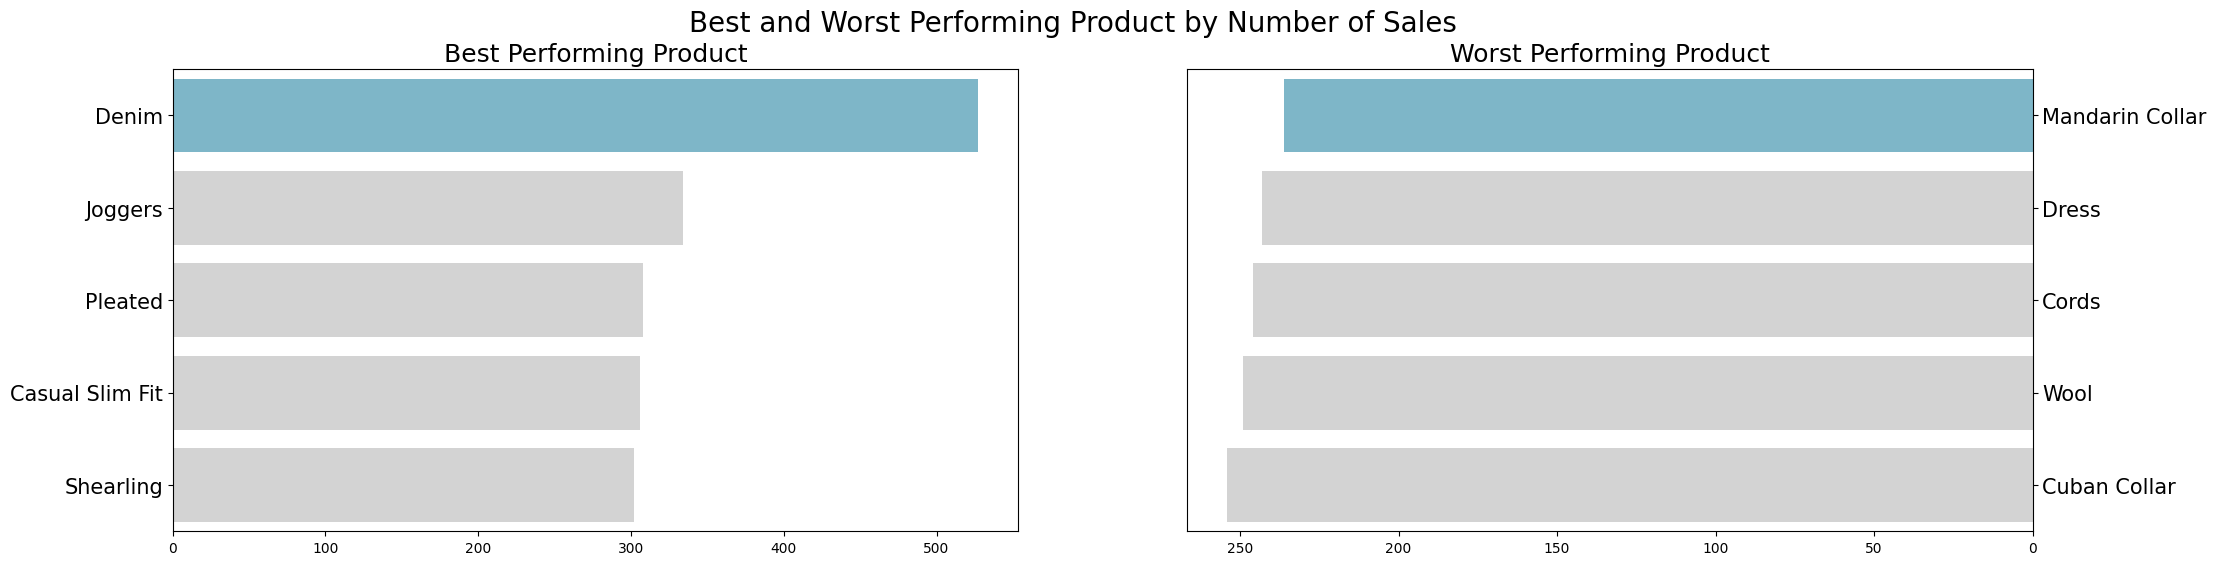

In [103]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="quantity_x", y="product_name", data=sum_order_items_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(x="quantity_x", y="product_name", data=sum_order_items_df.sort_values(by="quantity_x", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("Best and Worst Performing Product by Number of Sales", fontsize=20)
plt.show()

**Insight:**
- Pertanyaan 1 : Untuk Penjualan di beberapa bulan terakhir berdasarkan order counts mengalami beberapa kenaikan dan penurunan contoh di bulan maret,juni,juli,agustus mengalami kenaikan dan di bulan februari,mei,september,oktober mengalami penurunan & untuk penjualan terakhir berdasarkan revenue pada bulan maret,juni,juli mengalami kenaikan dan peda bulan februari,mei,agustus,september,oktober mengalami penurunan
- Pertannyaan 2 : produk apa yang sering banyak & sedikit terjual
Best Performing ( Denim, joggers, pleated, Casual Slim Fit, Shearling)
Worst Performing ( Mandarin Collar , Dress , Cords , Wool , Cuban Collar

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1 : Penjualan di beberapa bulan terakhir berdasarkan order counts mengalami beberapa kenaikan dan penurunan contoh di bulan maret,juni,juli,agustus mengalami kenaikan dan di bulan februari,mei,september,oktober mengalami penurunan & untuk penjualan terakhir berdasarkan revenue pada bulan maret,juni,juli mengalami kenaikan dan peda bulan februari,mei,agustus,september,oktober mengalami penurunan
- Conclution pertanyaan 2 :
 Best Performing ( Denim, joggers, pleated, Casual Slim Fit, Shearling)
Worst Performing ( Mandarin Collar , Dress , Cords , Wool , Cuban Collar